<a href="https://colab.research.google.com/github/j0rge-20/Precip/blob/main/Estadisticas_Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -q tensorflow-gpu
!pip install pandasql

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandasql as ps
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandasql import sqldf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from google.colab import files

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

#sql function def
pysqldf = lambda q: sqldf(q, globals())


#load dataset
#@title Loading dataset
path = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/Predicciones_V4.csv'

df = pd.read_csv(path,
                 parse_dates=['Fecha'],
                 index_col="Fecha")

print('#### Revisar repetidos dataframe ##########')
print (sqldf('select Estacion from (select Anio,Mes,Estacion, count(1) as qty from df  group by Anio,Mes,Estacion) where qty > 1 group by Estacion'))

#################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
#################graphics properties####################################


  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=66d0af13494af098993d539dc28cd4c63fef10ed776f2c57f08556338b50117e
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql
#### Revisar repetidos dataframe ##########
Empty DataFrame
Columns: [Estacion]
Index: []


Text(0.5, 0, 'Precipitación (mm)')

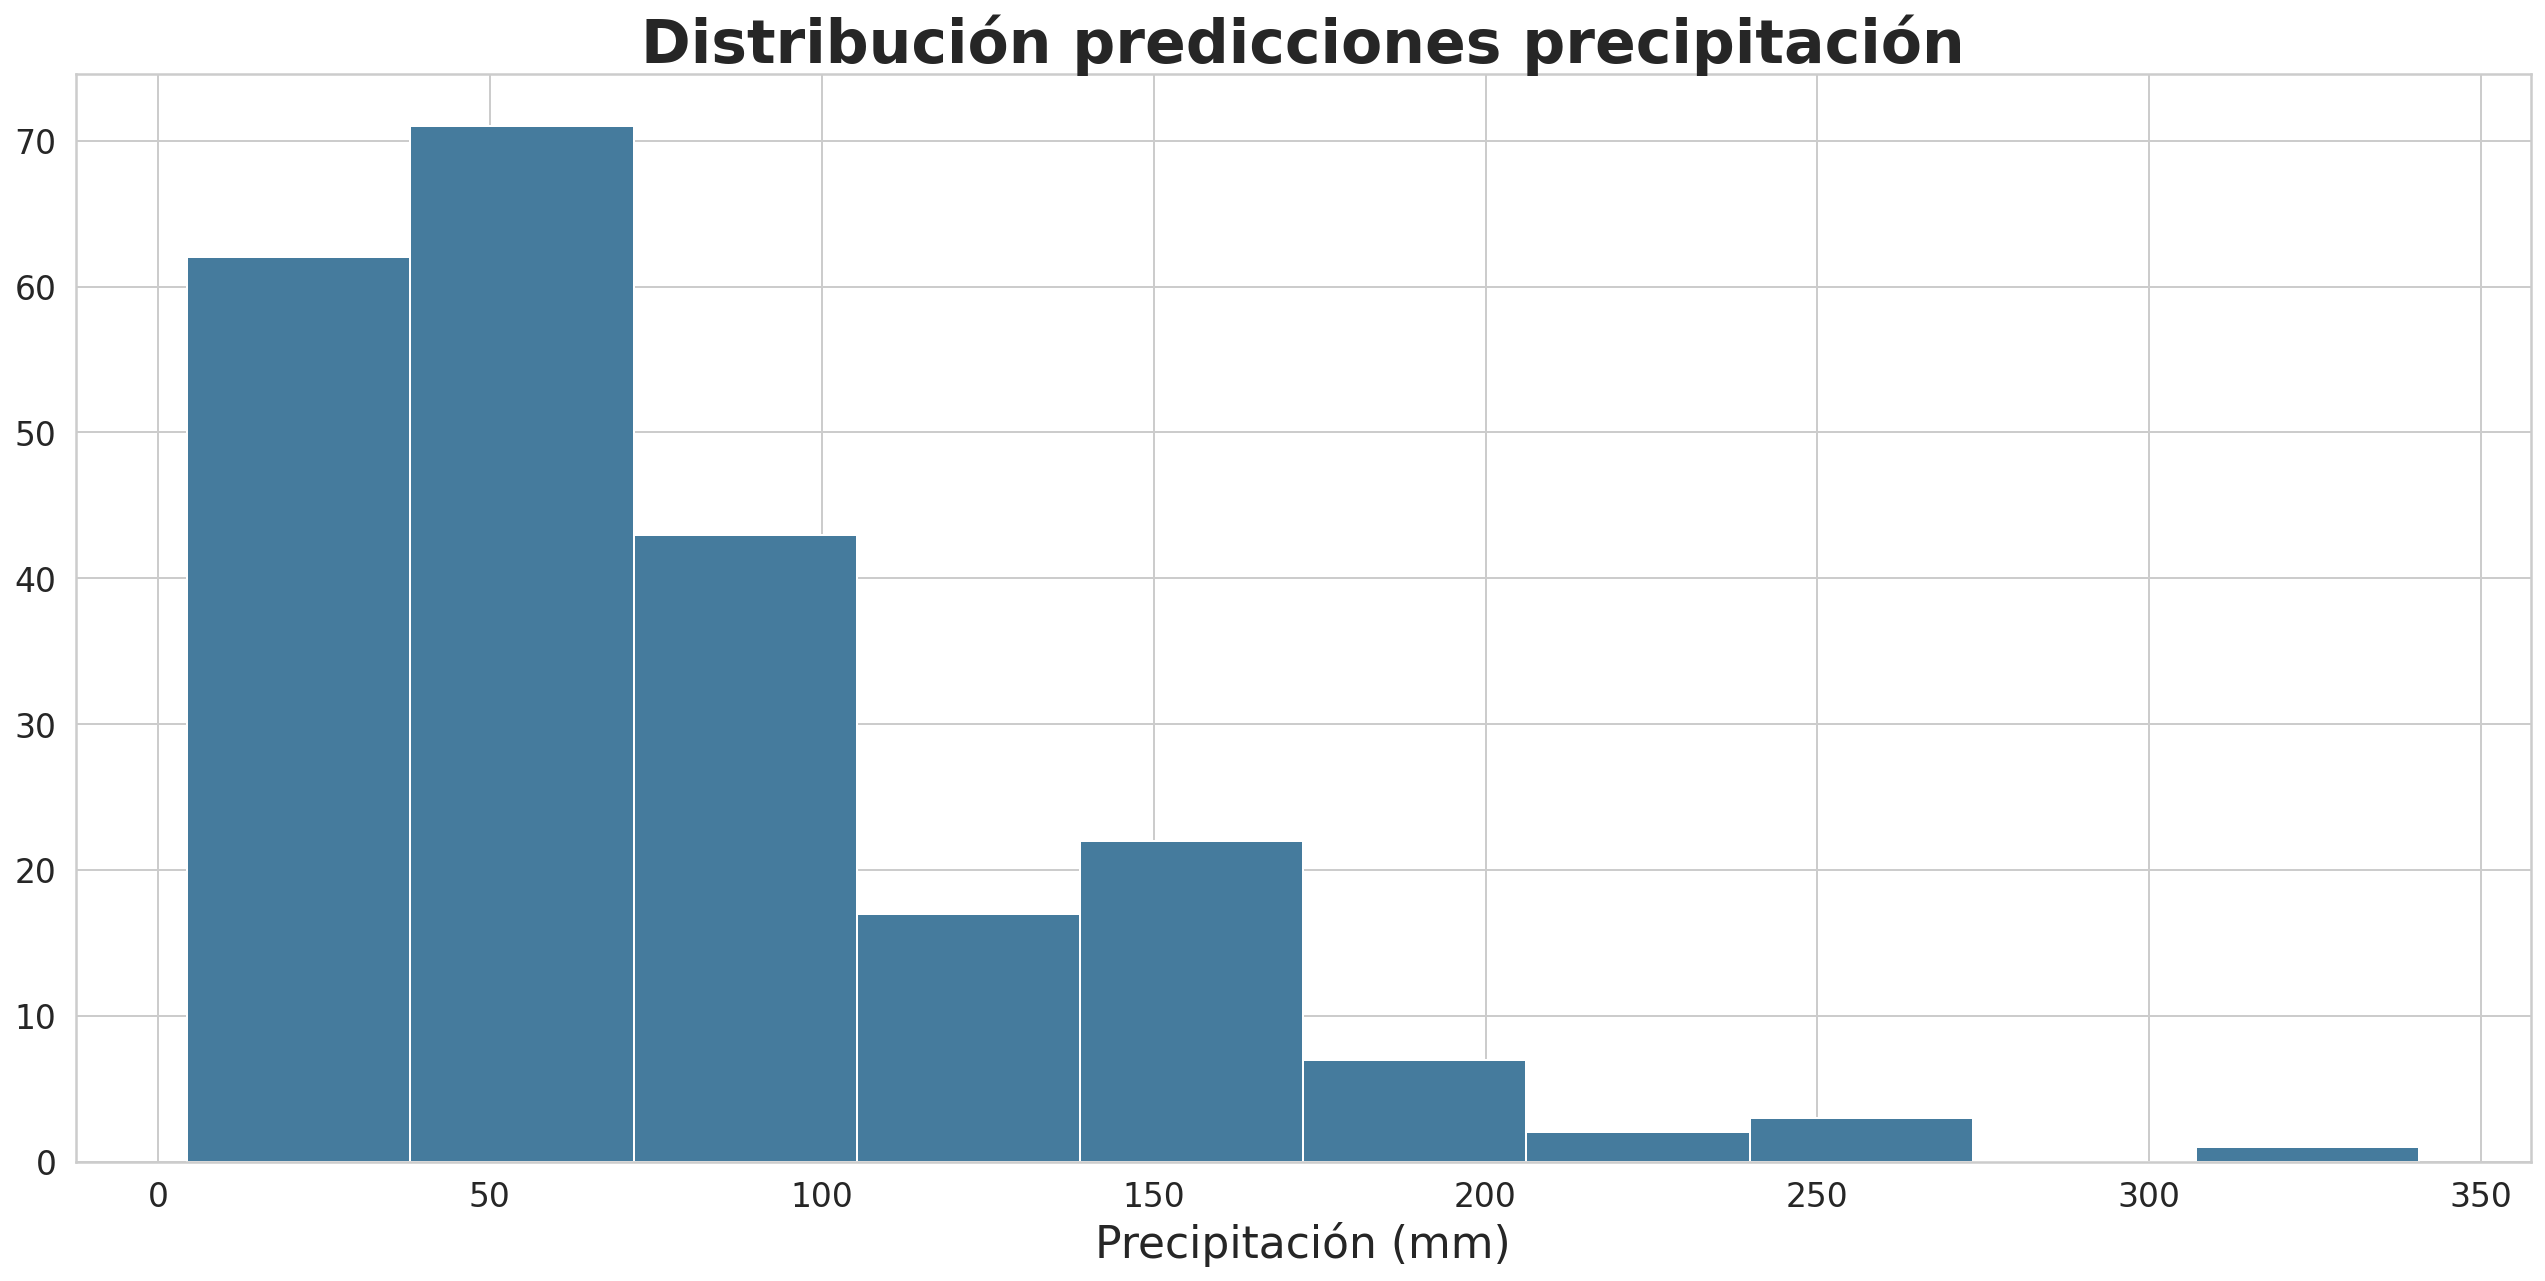

In [ ]:
#Histrogram
df_graphic = df.copy()
df_graphic.head(10)
val = df_graphic.values

#################graphics properties####################################
%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
#################graphics properties####################################


plt.hist(val[:,3],color='#457b9d')
plt.title('Distribución predicciones precipitación',fontweight="bold",fontsize = 30, loc = 'center')
plt.xlabel('Precipitación (mm)',fontsize = 22)



In [ ]:
#consultas

min = sqldf('select max(precipitacion) from df ')
max = sqldf('select min(precipitacion) from df ')
aver = sqldf('select avg(precipitacion) from df ')

print ('minimo: ',min)
print ('maximo: ',max)
print ('promedio: ',aver)


minimo:     max(precipitacion)
0          340.633148
maximo:     min(precipitacion)
0            4.405773
promedio:     avg(precipitacion)
0           76.250906
